## Testing out the Slidwing Window (SW) Implementation in ASDETECT

/home/lukasro/Documents/TIPMIP/toad/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


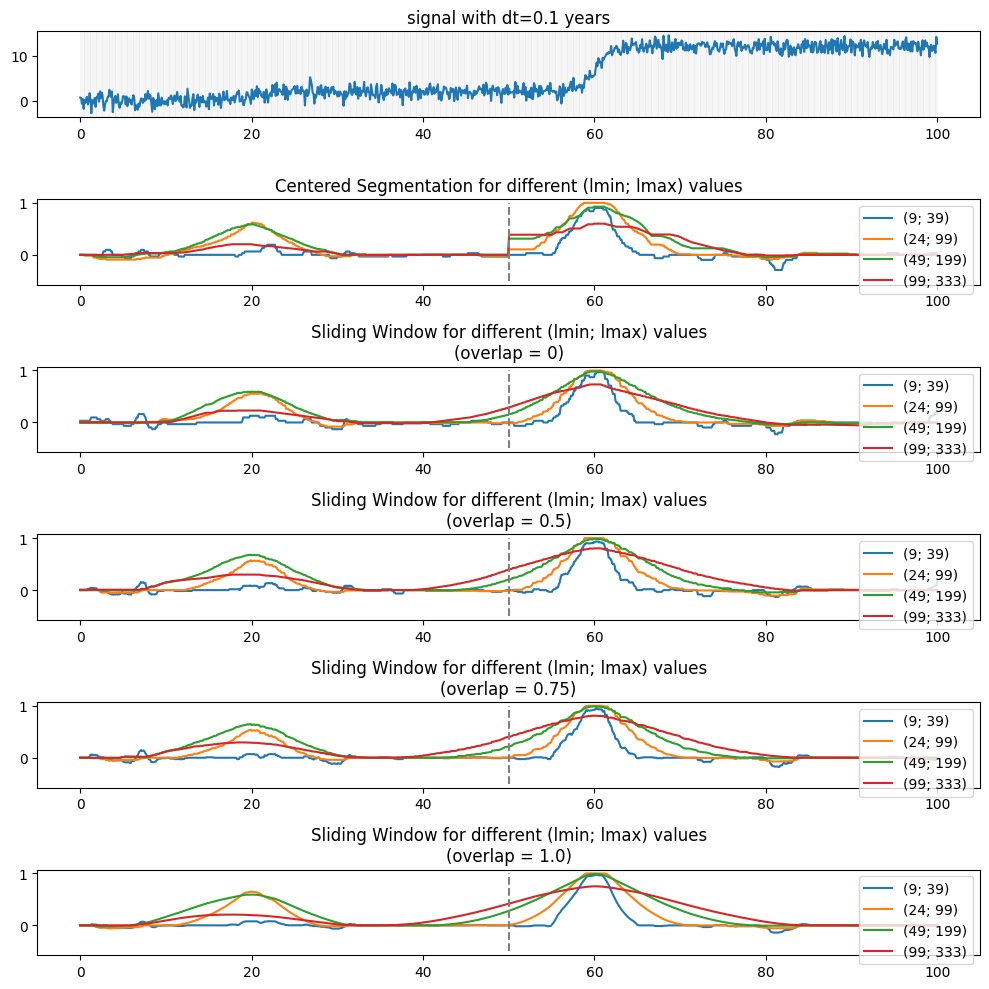

In [1]:
import toad 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from toad.shifts.methods.asdetect import ASDETECT
from toad.shifts.methods.asswdetect import ASSWDETECT

def shift(mag, t, t0):
    return mag * (1/(1 + np.exp(-(t-t0))))

# Do the following for two different time resolutions to show that lmin, lmax 
# are inferred/adapted correctly 
 
dt = 0.1
Tmax = 100 # years
nT = int(Tmax/dt) # number of gridpoints in time

# SIGNAL GENERATION =======================================================
noise = np.random.normal(size=nT)
time = np.linspace(0,Tmax, nT)

signal = (noise 
            + shift(10, time, 60)
            + shift(2,time,20)   
        )

# PLOT: SIGNAL ============================================================
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(ncols=1, nrows=6)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(time, signal)
for t in time:
    ax1.axvline(t, color='grey', alpha=0.1, lw=0.5, zorder=-1)
ax1.set_title(f'signal with dt={dt} years')

# PLOT: CENTERED SEGMENTATION ==========================
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
for lmin, lmax in [(9,39),(24,99),(49,199),(99,333)]:
    detector = ASDETECT(
        lmin=lmin,
        lmax=lmax,)
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax2.plot(time, dts, label=f'({lmin}; {lmax})')
ax2.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax2.set_title('Centered Segmentation for different (lmin; lmax) values')
ax2.legend()

# PLOT: SLIDING WINDOW ==========================
overlap = 0
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
for lmin, lmax in [(9,39),(24,99),(49,199),(99,333)]:
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap
    )
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax3.plot(time, dts, label=f'({lmin}; {lmax})')
ax3.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax3.set_title(f'Sliding Window for different (lmin; lmax) values\n(overlap = {overlap})')
ax3.legend()

# PLOT: SLIDING WINDOW ==========================
overlap = 0.5
ax4 = fig.add_subplot(gs[3, 0], sharex=ax1)
for lmin, lmax in [(9,39),(24,99),(49,199),(99,333)]:
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap,
    )
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax4.plot(time, dts, label=f'({lmin}; {lmax})')
ax4.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax4.set_title(f'Sliding Window for different (lmin; lmax) values\n(overlap = {overlap})')
ax4.legend()


# PLOT: SLIDING WINDOW ==========================
overlap = 0.75
ax5 = fig.add_subplot(gs[4, 0], sharex=ax1)
for lmin, lmax in [(9,39),(24,99),(49,199),(99,333)]:
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap,
    )
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax5.plot(time, dts, label=f'({lmin}; {lmax})')
ax5.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax5.set_title(f'Sliding Window for different (lmin; lmax) values\n(overlap = {overlap})')
ax5.legend()

# PLOT: SLIDING WINDOW ==========================
overlap = 1.0
ax6 = fig.add_subplot(gs[5, 0], sharex=ax1)
for lmin, lmax in [(9,39),(24,99),(49,199),(99,333)]:
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap,
    )
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax6.plot(time, dts, label=f'({lmin}; {lmax})')
ax6.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax6.set_title(f'Sliding Window for different (lmin; lmax) values\n(overlap = {overlap})')
ax6.legend()


plt.tight_layout()
plt.show()

## Check Sliding Steps

In [1]:
import toad 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from toad.shifts.methods.asdetect import ASDETECT
from toad.shifts.methods.asswdetect import ASSWDETECT

def shift(mag, t, t0):
    return mag * (1/(1 + np.exp(-(t-t0))))

def make_normalization_plot(counter, lmin, lmax, overlap):
    """Make a plot showing how often each point was counted in the detection time series.

    This is useful to understand the normalization of the detection time series.

    >> Args:
        counter:
            1D array of counts, shape (n,)
        lmin:
            Smallest segment length
        lmax:
            Largest segment length
        overlap:
            Relative overlap between segments
    """
    plt.figure(figsize=(10, 4))
    plt.plot(counter, label='Count of how often each point was included in a segment')
    plt.xlabel('Time index')
    plt.ylabel('Count')
    plt.title(f'Normalization Counter (lmin={lmin}, lmax={lmax}, overlap={overlap})')
    plt.legend()
    plt.grid()
    plt.show()

# Do the following for two different time resolutions to show that lmin, lmax 
# are inferred/adapted correctly 
 
dt = 1
Tmax = 100 # years
nT = int(Tmax/dt) # number of gridpoints in time

# SIGNAL GENERATION =======================================================
noise = np.random.normal(size=nT)
time = np.linspace(0,Tmax, nT)

signal = (noise 
            + shift(10, time, 60)
            + shift(2,time,20)   
        )

/home/lukasro/Documents/TIPMIP/toad/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


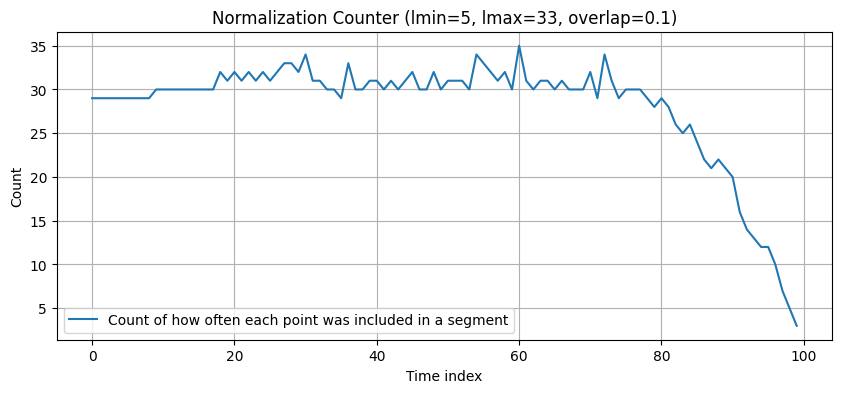

In [12]:
# new ASSWDETECT method

lmin = 5
lmax = nT//3
overlap = 0.1

# Computation
detector = ASSWDETECT(
    lmin=lmin,
    lmax=lmax,
    overlap=overlap,
)
dts = detector.fit_predict(
    signal,
    time,
    return_counter=True,
    #verbose=True,
)

make_normalization_plot(dts, lmin, lmax, overlap=overlap)

## Compare Computation Time

In [2]:
import toad 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from toad.shifts.methods.asdetect import ASDETECT
from toad.shifts.methods.asswdetect import ASSWDETECT

def shift(mag, t, t0):
    return mag * (1/(1 + np.exp(-(t-t0))))

# Do the following for two different time resolutions to show that lmin, lmax 
# are inferred/adapted correctly 
 
dt = 0.1
Tmax = 100 # years
nT = int(Tmax/dt) # number of gridpoints in time

lmin = 5
lmax = nT//3

# SIGNAL GENERATION =======================================================
noise = np.random.normal(size=nT)
time = np.linspace(0,Tmax, nT)

signal = (noise 
            + shift(10, time, 60)
            + shift(2,time,20)   
        )

In [3]:
# old ASDETECT method

# Computation
detector = ASDETECT(
    lmin=lmin,
    lmax=lmax,)
dts = detector.fit_predict(
    signal,
    time,
    )
        

In [4]:
# new ASSWDETECT method

# Computation
detector = ASSWDETECT(
    lmin=lmin,
    lmax=lmax,
    overlap=1,
)
dts = detector.fit_predict(
    signal,
    time,
)